In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from darts import TimeSeries, concatenate
from darts.dataprocessing.transformers import Scaler
from darts.metrics import mape
from darts.models import TFTModel
from darts.utils.likelihood_models import QuantileRegression
from darts.utils.statistics import check_seasonality, plot_acf
from darts.utils.timeseries_generation import datetime_attribute_timeseries

/Users/trop393/miniconda3/envs/uw/lib/python3.11/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [4]:
COLS = ["mean_swe", "mean_pr", "mean_tair", "mean_vs", "mean_srad", "mean_hum"]

In [2]:
data_path = "/Users/trop393/Documents/UW/FINAL/data/tests/model_ready_huc170103010101.csv"
df = pd.read_csv(data_path, index_col=0, parse_dates=True)

In [13]:
df

,mean_swe,mean_pr,mean_tair,mean_vs,mean_srad,mean_hum
day,,,,,,
1983-10-01,0.0,0.000000,4.814286,3.400000,173.342857,0.575000
1983-10-02,0.0,0.000000,5.942857,3.900000,75.442857,0.518929
1983-10-03,0.0,0.000000,6.921429,6.385714,119.914286,0.580357
1983-10-04,0.0,0.957143,7.864286,6.257143,137.228571,0.683214
1983-10-05,0.0,0.000000,6.450000,2.414286,160.400000,0.562929
...,...,...,...,...,...,...
2022-09-25,0.0,0.000000,14.642857,1.671429,182.414286,0.476071
2022-09-26,0.0,1.642857,18.792857,2.100000,185.842857,0.385714
2022-09-27,0.0,0.000000,20.764286,3.085714,179.100000,0.343143


In [16]:
df = df[COLS]
series_swe = TimeSeries.from_dataframe(df, value_cols="mean_swe")
series_hum = TimeSeries.from_dataframe(df, value_cols="mean_hum")

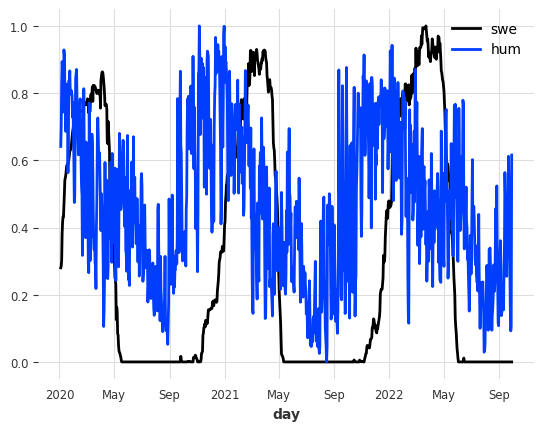

In [27]:
scaler_swe, scaler_hum = Scaler(), Scaler()
series_swe_scaled = scaler_swe.fit_transform(series_swe[-1000:])
series_hum_scaled = scaler_hum.fit_transform(series_hum[-1000:])

series_swe_scaled.plot(label="swe")
series_hum_scaled.plot(label="hum")
plt.legend();

In [34]:
train, val = series_swe_scaled[-1000:-500], series_swe_scaled[-500:]

In [35]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

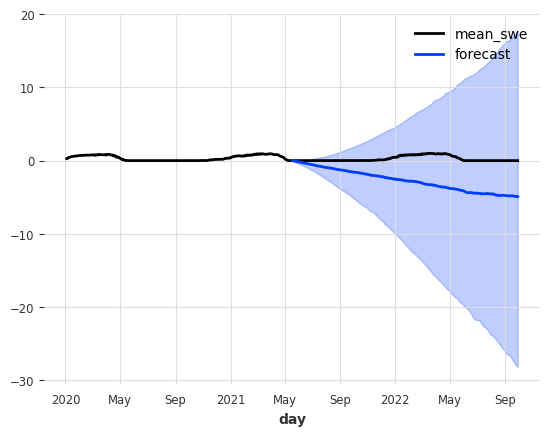

In [37]:
import matplotlib.pyplot as plt

series_swe_scaled.plot()
prediction.plot(label="forecast")#, low_quantile=0.05, high_quantile=0.95)
plt.legend()